# Laboratorio Pandas - Dataset E-Commerce

In [1]:
import pandas as pd

In [3]:
ecomm = pd.read_csv('recursos/Ecommerce Purchases')

In [4]:
ecomm.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82


In [5]:
ecomm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Address           10000 non-null  object 
 1   Lot               10000 non-null  object 
 2   AM or PM          10000 non-null  object 
 3   Browser Info      10000 non-null  object 
 4   Company           10000 non-null  object 
 5   Credit Card       10000 non-null  int64  
 6   CC Exp Date       10000 non-null  object 
 7   CC Security Code  10000 non-null  int64  
 8   CC Provider       10000 non-null  object 
 9   Email             10000 non-null  object 
 10  Job               10000 non-null  object 
 11  IP Address        10000 non-null  object 
 12  Language          10000 non-null  object 
 13  Purchase Price    10000 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [6]:
# precio min max de compras

In [7]:
ecomm['Purchase Price'].max()

99.99

In [8]:
ecomm['Purchase Price'].min()

0.0

In [9]:
ecomm['Purchase Price'].mean()

50.34730200000025

In [10]:
# cuantas compras se hicieron con el idioma español en el sitio
ecomm[ecomm['Language'] == 'es'].count()

Address             1095
Lot                 1095
AM or PM            1095
Browser Info        1095
Company             1095
Credit Card         1095
CC Exp Date         1095
CC Security Code    1095
CC Provider         1095
Email               1095
Job                 1095
IP Address          1095
Language            1095
Purchase Price      1095
dtype: int64

In [11]:
ecomm['Language'].value_counts()

de    1155
ru    1155
el    1137
pt    1118
en    1098
fr    1097
es    1095
it    1086
zh    1059
Name: Language, dtype: int64

In [14]:
ecomm['Job'].value_counts().head(5)

Interior and spatial designer    31
Lawyer                           30
Social researcher                28
Designer, jewellery              27
Purchasing manager               27
Name: Job, dtype: int64

In [15]:
ecomm['Job'].value_counts().tail(5)

Special effects artist         7
Editor, film/video             6
Actuary                        6
Investment analyst             5
Information systems manager    5
Name: Job, dtype: int64

In [16]:
ecomm['AM or PM'].value_counts()

PM    5068
AM    4932
Name: AM or PM, dtype: int64

In [17]:
ecomm[ecomm['Credit Card'] == 6011578504430710]['Email']

3    brent16@olson-robinson.info
Name: Email, dtype: object

In [ ]:
# cuantas personas tienen Mastercard e hicieron compras mayores a 15?

In [23]:
gente_mastercard = ecomm[(ecomm['CC Provider'] == 'Mastercard') & (ecomm['Purchase Price'] > 15)]

In [26]:
gente_mastercard['Job'].value_counts().head(10)

Jewellery designer                 5
Freight forwarder                  5
Engineer, manufacturing systems    5
Equities trader                    4
Land/geomatics surveyor            4
Merchandiser, retail               4
Automotive engineer                4
Medical sales representative       4
Designer, multimedia               4
Editorial assistant                4
Name: Job, dtype: int64

In [27]:
# de cuantas personas la tarjeta de credito va a expirar en el 2025?

In [28]:
# ej. 03/20 o 12/25 -> split -> ['12', '25']
def sacar_anio_tarjeta(fecha_exp):
    return fecha_exp.split('/')[1]   

In [29]:
sacar_anio_tarjeta('03/20')

'20'

In [30]:
sacar_anio_tarjeta('4/25')

'25'

In [37]:
sum(ecomm['CC Exp Date'].apply(lambda fecha: sacar_anio_tarjeta(fecha)) == '25')

1033

In [38]:
ecomm['exp25'] = ecomm['CC Exp Date'].apply(lambda fecha: sacar_anio_tarjeta(fecha)) == '25'

In [40]:
ecomm.head()

,Address,Lot,AM or PM,Browser Info,Company,Credit Card,CC Exp Date,CC Security Code,CC Provider,Email,Job,IP Address,Language,Purchase Price,exp25
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,6011929061123406,02/20,900,JCB 16 digit,pdunlap@yahoo.com,"Scientist, product/process development",149.146.147.205,el,98.14,False
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",3337758169645356,11/18,561,Mastercard,anthony41@reed.com,Drilling engineer,15.160.41.51,fr,70.73,False
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",675957666125,08/19,699,JCB 16 digit,amymiller@morales-harrison.com,Customer service manager,132.207.160.22,de,0.95,False
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",6011578504430710,02/24,384,Discover,brent16@olson-robinson.info,Drilling engineer,30.250.74.19,es,78.04,False
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",6011456623207998,10/25,678,Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,24.140.33.94,es,77.82,True


In [41]:
ecomm[ecomm['exp25'] == True].count()

Address             1033
Lot                 1033
AM or PM            1033
Browser Info        1033
Company             1033
Credit Card         1033
CC Exp Date         1033
CC Security Code    1033
CC Provider         1033
Email               1033
Job                 1033
IP Address          1033
Language            1033
Purchase Price      1033
exp25               1033
dtype: int64

In [42]:
# cuales son los top 5 proveedores de correo electronico?

In [43]:
ecomm['Email'].apply(lambda email: email.split('@')[1]).value_counts().head(5)

hotmail.com     1638
yahoo.com       1616
gmail.com       1605
smith.com         42
williams.com      37
Name: Email, dtype: int64

In [44]:
proveedores = ecomm['Email'].apply(lambda email: email.split('@')[1]).value_counts().head(5)

In [45]:
type(proveedores)

pandas.core.series.Series

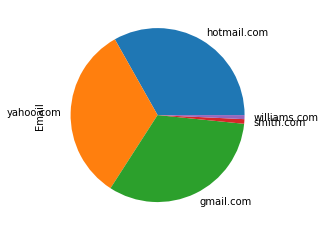

In [48]:
proveedores.plot.pie()